In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('train3.csv')
dataset.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [3]:
dataset.shape

(8693, 14)

In [4]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
features_with_na

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [5]:
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4),' % missing values')

HomePlanet 2.3122  % missing values
CryoSleep 2.4963  % missing values
Cabin 2.2892  % missing values
Destination 2.0936  % missing values
Age 2.0591  % missing values
VIP 2.3352  % missing values
RoomService 2.0821  % missing values
FoodCourt 2.1051  % missing values
ShoppingMall 2.3927  % missing values
Spa 2.1051  % missing values
VRDeck 2.1627  % missing values
Name 2.3007  % missing values


<AxesSubplot:xlabel='Transported', ylabel='count'>

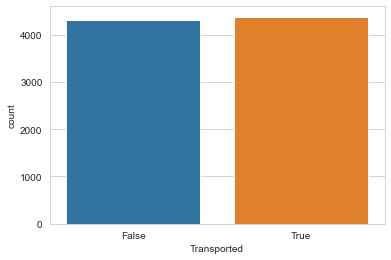

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Transported',data=dataset)

<AxesSubplot:xlabel='Transported', ylabel='count'>

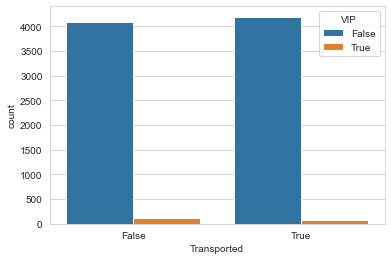

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Transported',hue='VIP',data=dataset)

<AxesSubplot:xlabel='Transported', ylabel='count'>

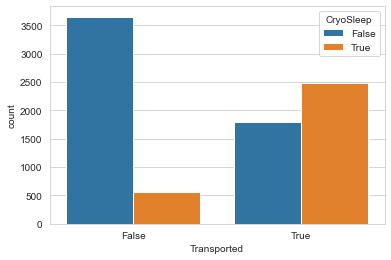

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Transported',hue='CryoSleep',data=dataset)

<AxesSubplot:xlabel='VIP', ylabel='count'>

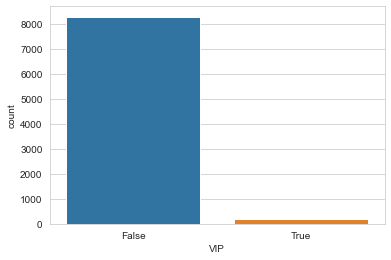

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='VIP',data=dataset)

<AxesSubplot:xlabel='Transported', ylabel='Age'>

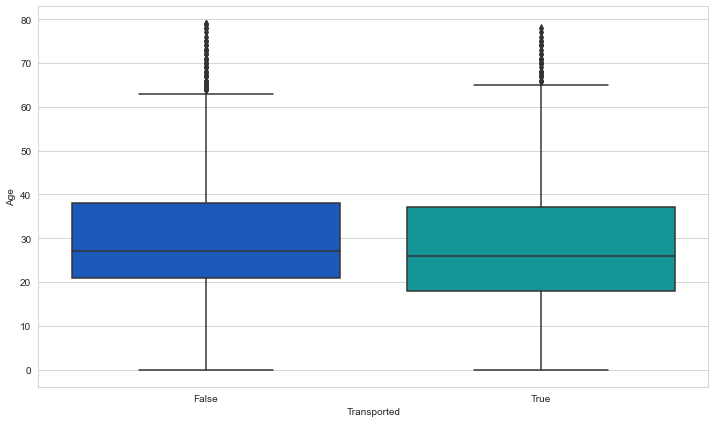

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Transported',y='Age',data=dataset,palette='winter')

<AxesSubplot:xlabel='Transported', ylabel='count'>

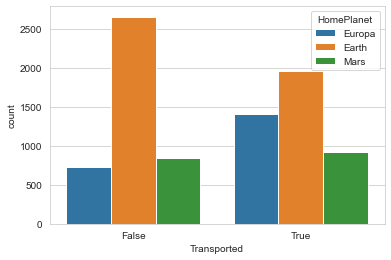

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Transported',hue='HomePlanet',data=dataset)

In [13]:
print("Id of Pasengers {}".format(len(dataset.PassengerId)))

Id of Pasengers 8693


In [15]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O' and feature not in['Transported']]

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  6


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [18]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in dataset.columns if len(dataset[feature].unique())<25 and feature not in['PassengerId','Transported']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

dataset[discrete_feature].head()


Discrete Variables Count: 4


,HomePlanet,CryoSleep,Destination,VIP
0,Europa,False,TRAPPIST-1e,False
1,Earth,False,TRAPPIST-1e,False
2,Europa,False,TRAPPIST-1e,True
3,Europa,False,TRAPPIST-1e,False
4,Earth,False,TRAPPIST-1e,False


In [20]:
dataset['Cabin'].nunique()

6560

In [21]:
discrete_feature

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

/Users/akshitsharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

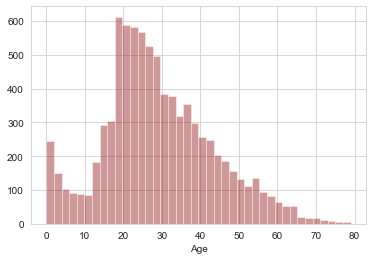

In [22]:
sns.distplot(dataset['Age'].dropna(),kde=False,color='darkred',bins=40)


<AxesSubplot:>

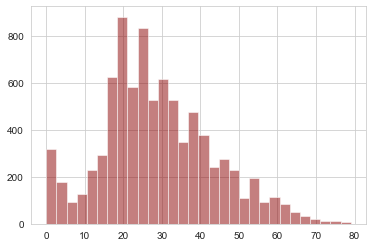

In [29]:
dataset['Age'].hist(bins=30,color='darkred',alpha=0.5)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

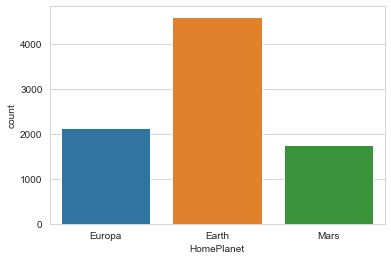

In [31]:
sns.countplot(x='HomePlanet',data=dataset)

<AxesSubplot:xlabel='Destination', ylabel='count'>

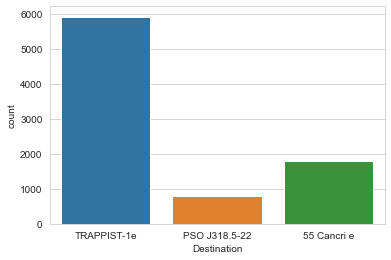

In [32]:
sns.countplot(x='Destination',data=dataset)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

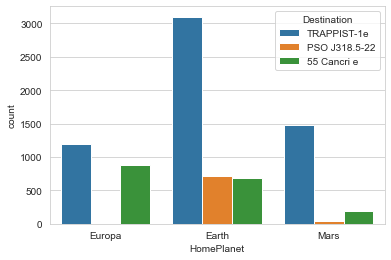

In [33]:
sns.countplot(x='HomePlanet',hue='Destination',data=datasetb

In [34]:
numerical_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
dataset['RoomService'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:>

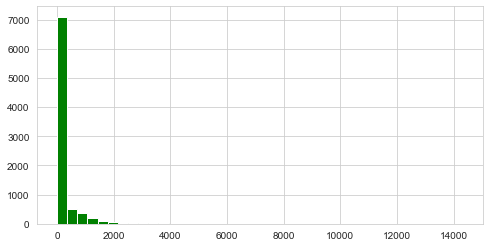

In [39]:
dataset['RoomService'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:>

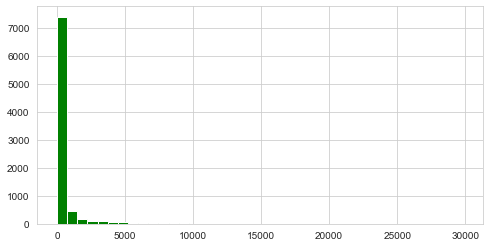

In [40]:
dataset['FoodCourt'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:>

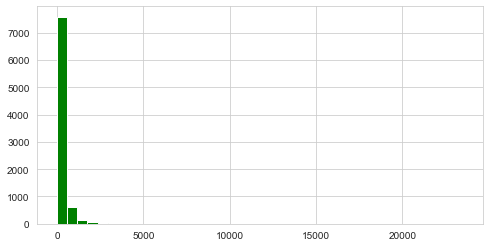

In [41]:
dataset['ShoppingMall'].hist(color='green',bins=40,figsize=(8,4))